In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sms
import os
import inspect

In [11]:
fname='../Data_In/ISTART_Combined_PersonalityData_020722.xlsx'
df=pd.read_excel(fname)
print(df.columns.tolist())

['participant_id', 'age_participant', 'age_friend', 'score_teps_ant', 'score_teps_con', 'aadis_q1', 'aadis_q2', 'aadis_q3', 'aadis_q4', 'aadis_q5', 'aadis_q6', 'aadis_q7', 'aadis_q8', 'aadis_q9', 'aadis_q10', 'aadis_q11', 'aadis_q12', 'aadis_q13', 'aadis_other', 'score_aadis', 'score_asrm', 'score_susd_mania', 'score_susd_depress', 'score_iri_perspectivetaking', 'score_iri_fantasy', 'score_iri_empathicconcern', 'score_iri_perso999ldistress', 'score_aq_socialskill', 'score_aq_attnswitch', 'score_aq_attndetail', 'score_aq_communication', 'score_aq_imagi999tion', 'score_aq_total', 'score_tei_wellbeing', 'score_tei_selfcontrol', 'score_tei_emotio999lity', 'score_tei_sociability', 'score_tei_globaltrait', 'score_pnr_total', 'score_pvss_total', 'score_pvss_food', 'score_pvss_phystouch', 'score_pvss_outdoors', 'score_pvss_posfeedback', 'score_pvss_hobbies', 'score_pvss_socinteract', 'score_pvss_goal', 'seq_adult_overtvictim', 'seq_adult_relatio999lvict', 'seq_adult_prosocialacts', 'ctqsf_a_em

In [28]:
df = df[['participant_id', 'SPSRWD', 'BISBAS_BAS', 'SPSRWD.1', 'BISBAS_BAS.1','BISBAS_BAS_Quintiles', 'SPSRWD_Quintiles', 'QUIN_DIFF']]
df = df['N' in df['participant_id']]
cormat=df.corr()
display(cormat)
fig = plt.figure(figsize=(12, 8))
sms.heatmap(cormat,cmap='vlag',vmin=-1)


KeyError: False

Correlation between reward sensitivity is 
 R^2: 0.4582872755754281 p: 1.5333008566420115e-09


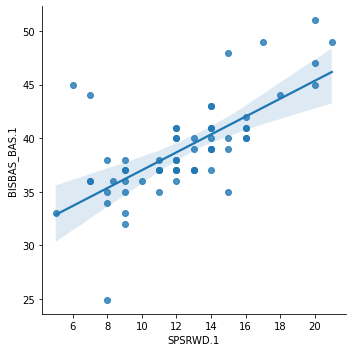

<class 'seaborn.axisgrid.FacetGrid'>


In [18]:
r,p=stats.pearsonr(df['SPSRWD.1'],df['BISBAS_BAS.1'])
print("Correlation between reward sensitivity is \n R^2: %s p: %s"%(r**2,p))
g=sms.lmplot(x='SPSRWD.1',y='BISBAS_BAS.1',data=df)
plt.show()
print(type(g))


In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)

features=['SPSRWD','BISBAS_BAS']
X = df.loc[:, features].values
PC1=pca.fit_transform(X)
print(PC1)

df['PC1']=PC1
display(df['PC1'])
df.to_csv(fname,index='False')

[[  0.68841083]
 [ -1.41780736]
 [  0.85358149]
 [  1.10192185]
 [  1.10192185]
 [  0.19289882]
 [ -1.70714821]
 [ -1.70714821]
 [ -0.46778384]
 [ -2.69817221]
 [  0.64741034]
 [ -2.32683039]
 [  1.10192185]
 [ -9.18433487]
 [  3.91099191]
 [ -1.54197754]
 [ -5.13590045]
 [  2.50645688]
 [ -3.73136542]
 [  9.52913203]
 [  1.72160403]
 [  6.72006197]
 [ -2.32683039]
 [ 11.39149789]
 [ -0.30261318]
 [ 10.80949688]
 [ -4.51621827]
 [  1.8867747 ]
 [ -3.89653609]
 [  8.78527967]
 [ -4.3510476 ]
 [  2.67162755]
 [  1.10192185]
 [  1.26709252]
 [ -2.16165972]
 [-13.66951552]
 [  3.12613906]
 [ -1.54197754]
 [  3.58065058]
 [ -8.06914069]
 [ -5.75558263]
 [  1.26709252]
 [ -3.73136542]
 [ -7.65562966]
 [  3.91099191]
 [ -0.92229536]
 [ -3.56619475]
 [  3.91099191]
 [ -6.70560615]
 [ -3.40102408]
 [ 11.09883773]
 [ -1.08746603]
 [ -0.92229536]
 [  1.43226319]
 [  3.12613906]
 [  7.50491482]
 [ -1.08746603]
 [  8.57910852]
 [ -3.2768539 ]
 [ -3.11168324]
 [ -2.32683039]
 [ -1.08746603]
 [  1.43

0     0.688411
1    -1.417807
2     0.853581
3     1.101922
4     1.101922
        ...   
86    2.671628
87   -5.590412
88   -1.087466
89    0.482240
90   -1.707148
Name: PC1, Length: 91, dtype: float64

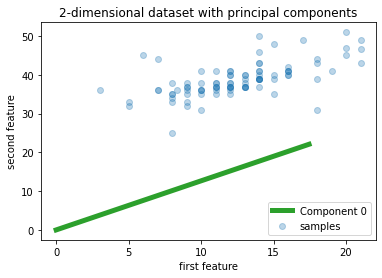

In [7]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()